<a href="https://colab.research.google.com/github/revindaamalias/SCIFEST/blob/main/face_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip uninstall fastai

Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/fastai-1.0.61.dist-info/*
    /usr/local/lib/python3.10/dist-packages/fastai/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 680, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 375, in remove
    if auto_confirm or self._allowed_to_proceed(verbose):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 415,

In [ ]:
pip install 'fastai<2.0.0'

In [ ]:
import fastai
fastai.__version__

'1.0.61'

In [ ]:
pip install torch==1.5.0+cpu torchvision==0.6.0+cpu -f


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-f option requires 1 argument
^C


In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
from pathlib import Path

In [ ]:
x = "/content/drive/MyDrive/mask_detection/"
path = Path(x)
path.ls

<bound method <lambda> of PosixPath('/content/drive/MyDrive/mask_detection')>

In [ ]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2, size=224,num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


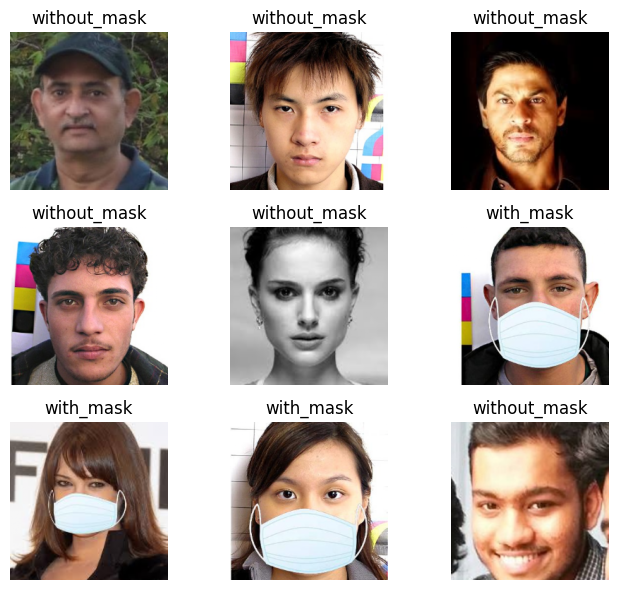

In [ ]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

In [ ]:
print(data.classes)
len(data.classes)
data.c

['0', '1', 'with_mask', 'without_mask']


4

In [ ]:
data

ImageDataBunch;

Train: LabelList (910 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
without_mask,without_mask,without_mask,without_mask,without_mask
Path: /content/drive/MyDrive/mask_detection;

Valid: LabelList (227 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
without_mask,without_mask,with_mask,with_mask,with_mask
Path: /content/drive/MyDrive/mask_detection;

Test: None

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('/content/drive/MyDrive/mask_detection/'),path = Path("."))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
lr1 = 1e-3
lr2 - 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

In [ ]:
learn.recorder.plot_losses()

In [ ]:
interp = ClassificationInterpretation.from_learne(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(6,figsize = (25,5))

In [ ]:
learn.export(file = Path("/content/drive/MyDrive/mask_detection/maskdata"))
learn.model_dir = "/content/drive/MyDrive/mask_detection/maskdata"
learn.save("stage-1", return_path=True)